In [24]:
import pandas as pd
import altair as alt
import sqlite3

In [4]:
pd.set_option('display.max_columns', 500)

In [11]:
df = pd.read_csv('data/incarceration_trends_w_percs.csv', index_col=0)

In [12]:
df.head()

,yfips,year,fips,state,county_name,total_pop,total_pop_15to64,female_pop_15to64,male_pop_15to64,asian_pop_15to64,black_pop_15to64,latino_pop_15to64,native_pop_15to64,other_pop_15to64,white_pop_15to64,urbanicity,region,division,commuting_zone,metro_area,land_area,total_jail_adm,total_jail_adm_dcrp,female_jail_adm_dcrp,male_jail_adm_dcrp,total_jail_pop,female_jail_pop,male_jail_pop,asian_jail_pop,black_jail_pop,latino_jail_pop,native_jail_pop,white_jail_pop,total_jail_pretrial,female_jail_pretrial,male_jail_pretrial,jail_from_state_prison,jail_from_other_state_prison,jail_from_state_jail,jail_from_other_state_jail,jail_from_fed,jail_from_ice,total_jail_pop_dcrp,female_jail_pop_dcrp,male_jail_pop_dcrp,total_prison_pop,female_prison_pop,male_prison_pop,asian_prison_pop,black_prison_pop,latino_prison_pop,native_prison_pop,other_prison_pop,white_prison_pop,total_prison_adm,female_prison_adm,male_prison_adm,asian_prison_adm,black_prison_adm,latino_prison_adm,native_prison_adm,other_prison_adm,white_prison_adm,num_facilites,num_employees,confined_pop,capacity,ucr_population,index_crime,violent_crime,property_crime,murder_crime,rape_crime,robbery_crime,agr_assault_crime,burglary_crime,larceny_crime,mv_theft_crime,arson_crime,perc_white_total_pop,perc_black_total_pop,perc_white_jail_pop,perc_black_jail_pop,perc_white_prison_pop,perc_black_prison_pop
0,197001001,1970,1001,AL,Autauga County,24661,14154,7293,6861,NaN,3413,NaN,NaN,15.0,10726,small/mid,South,East South Central,60.0,33860.0,594.449,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.757807,0.241133,NaN,NaN,NaN,NaN
1,197101001,1971,1001,AL,Autauga County,25503,14765,7585,7180,NaN,3451,NaN,NaN,24.0,11290,small/mid,South,East South Central,60.0,33860.0,594.449,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.764646,0.233728,NaN,NaN,NaN,NaN
2,197201001,1972,1001,AL,Autauga County,27156,15939,8168,7771,NaN,3625,NaN,NaN,31.0,12283,small/mid,South,East South Central,60.0,33860.0,594.449,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.770626,0.227430,NaN,NaN,NaN,NaN
3,197301001,1973,1001,AL,Autauga County,28453,16906,8651,8255,NaN,3747,NaN,NaN,41.0,13118,small/mid,South,East South Central,60.0,33860.0,594.449,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.775938,0.221637,NaN,NaN,NaN,NaN
4,197401001,1974,1001,AL,Autauga County,29261,17578,8992,8586,NaN,3791,NaN,NaN,49.0,13738,small/mid,South,East South Central,60.0,33860.0,594.449,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.781545,0.215667,NaN,NaN,NaN,NaN


In [13]:
california = df[df['state'] == 'CA']

In [18]:
california_2015 = california[california['year']==2015]

In [22]:
california_2015.head(10)

,yfips,year,fips,state,county_name,total_pop,total_pop_15to64,female_pop_15to64,male_pop_15to64,asian_pop_15to64,black_pop_15to64,latino_pop_15to64,native_pop_15to64,other_pop_15to64,white_pop_15to64,urbanicity,region,division,commuting_zone,metro_area,land_area,total_jail_adm,total_jail_adm_dcrp,female_jail_adm_dcrp,male_jail_adm_dcrp,total_jail_pop,female_jail_pop,male_jail_pop,asian_jail_pop,black_jail_pop,latino_jail_pop,native_jail_pop,white_jail_pop,total_jail_pretrial,female_jail_pretrial,male_jail_pretrial,jail_from_state_prison,jail_from_other_state_prison,jail_from_state_jail,jail_from_other_state_jail,jail_from_fed,jail_from_ice,total_jail_pop_dcrp,female_jail_pop_dcrp,male_jail_pop_dcrp,total_prison_pop,female_prison_pop,male_prison_pop,asian_prison_pop,black_prison_pop,latino_prison_pop,native_prison_pop,other_prison_pop,white_prison_pop,total_prison_adm,female_prison_adm,male_prison_adm,asian_prison_adm,black_prison_adm,latino_prison_adm,native_prison_adm,other_prison_adm,white_prison_adm,num_facilites,num_employees,confined_pop,capacity,ucr_population,index_crime,violent_crime,property_crime,murder_crime,rape_crime,robbery_crime,agr_assault_crime,burglary_crime,larceny_crime,mv_theft_crime,arson_crime,perc_white_total_pop,perc_black_total_pop,perc_white_jail_pop,perc_black_jail_pop,perc_white_prison_pop,perc_black_prison_pop
8834,201506001,2015,6001,CA,Alameda County,1611572,1120496,566492,554004,349561.0,134719,247838.0,4049.0,NaN,384329,urban,West,Pacific,294.0,41860.0,737.307,49378.0,NaN,NaN,NaN,2583.0,224.0,2324.0,65.0,1296.0,647.0,12.0,426.0,2155.0,262.0,3344.0,61.0,3.0,723.0,573.0,317.0,0.0,NaN,NaN,NaN,3762.0,107.0,3655.0,79.0,2499.0,649.0,22.0,138.0,361.0,749.0,22.0,727.0,27.0,476.0,151.0,NaN,24.0,71.0,3.0,262.0,1572.0,1209.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.342999,0.120232,0.164925,0.501742,0.095960,0.664274
8881,201506003,2015,6003,CA,Alpine County,1084,688,328,360,16.0,7,66.0,155.0,NaN,444,rural,West,Pacific,211.0,NaN,738.340,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.645349,0.010174,NaN,NaN,NaN,NaN
8928,201506005,2015,6005,CA,Amador County,36748,22959,10204,12755,400.0,767,3311.0,435.0,NaN,18046,rural,West,Pacific,211.0,NaN,594.572,1524.0,NaN,NaN,NaN,87.0,17.0,68.0,1.0,6.0,8.0,3.0,63.0,28.0,4.0,20.0,2.0,0.0,3.0,0.0,0.0,0.0,NaN,NaN,NaN,111.0,NaN,NaN,NaN,9.0,23.0,7.0,9.0,63.0,35.0,NaN,NaN,0.0,NaN,6.0,NaN,6.0,23.0,1.0,0.0,3755.0,3614.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.786010,0.033407,0.724138,0.068966,0.567568,0.081081
8975,201506007,2015,6007,CA,Butte County,223629,148189,73632,74557,7876.0,3212,23112.0,2835.0,NaN,111154,small/mid,West,Pacific,348.0,17020.0,1636.470,12328.0,NaN,NaN,NaN,578.0,84.0,515.0,18.0,60.0,65.0,31.0,420.0,350.0,54.0,380.0,22.0,1.0,4.0,1.0,2.0,0.0,NaN,NaN,NaN,905.0,52.0,853.0,14.0,99.0,142.0,27.0,18.0,605.0,329.0,27.0,302.0,10.0,32.0,52.0,9.0,6.0,220.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750083,0.021675,0.726644,0.103806,0.668508,0.109392
9022,201506009,2015,6009,CA,Calaveras County,44677,27214,13592,13622,502.0,349,3246.0,477.0,NaN,22640,rural,West,Pacific,211.0,NaN,1020.016,1809.0,NaN,NaN,NaN,94.0,19.0,62.0,1.0,2.0,4.0,2.0,71.0,39.0,3.0,49.0,5.0,1.0,2.0,0.0,2.0,0.0,NaN,NaN,NaN,96.0,5.0,91.0,NaN,0.0,9.0,6.0,2.0,79.0,48.0,4.0,44.0,0.0,NaN,6.0,NaN,4.0,38.0,1.0,0.0,108.0,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.831925,0.012824,0.755319,0.021277,0.822917,0.000000
9069,201506011,2015,6011,CA,Colusa County,21268,13476,6488,6988,257.0,186,7952.0,187.0,NaN,4894,rural,West,Pacific,348.0,NaN,1150.713,1305.0,NaN,NaN,NaN,78.0,11.0,78.0,0.0,5.0,54.0,2.0,28.0,23.0,4.0,18.0,1.0,0.0,1.0,0.0,8.0,0.0,NaN,NaN,NaN,63.0,NaN,NaN,0.0,NaN,30.0,0.0,3.0,30.0,17.0,0.0,17.0,0.0,0.0,9.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

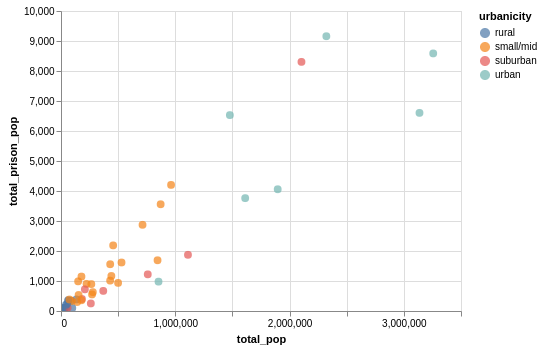

In [21]:
alt.Chart(california_2015.drop([9680])).mark_circle(size=60).encode(
    x='total_pop',
    y='total_prison_pop',
    color='urbanicity',
    tooltip=['county_name', 'total_pop', 'total_prison_pop']
).interactive()

## Test for most recent year with good data using SQL

* Find number of counties in a state
* Test if a threshold % of 'total_prison_pop' variables are null
* Return data for the most recent year with x% non-null values

```
SELECT
   count(1) as TotalAll,
   count(variable_value) as TotalNotNull,
   count(1) - count(variable_value) as TotalNull,
   100.0 * count(variable_value) / count(1) as PercentNotNull
FROM
   games
WHERE
   category_id = '10'
  ```

In [25]:
# Connect to database
conn = sqlite3.connect('./db/incarceration.db')

In [73]:
def test_nulls_for_year(year):
    percent_nulls = pd.read_sql_query(f"""SELECT
                                   count(1) as TotalAll,
                                   count(total_prison_pop) as TotalNotNull,
                                   count(1) - count(total_prison_pop) as TotalNull,
                                   100.0 * count(total_prison_pop) / count(1) as PercentNotNull
                                FROM
                                   incarceration
                                WHERE state = '{state_name}'
                                AND year = {year};
                                """, conn)
    return percent_nulls


state_name = 'CA'    
    
#Query the database
conn = sqlite3.connect('./db/incarceration.db')

year_2016_nulls = test_nulls_for_year(2016)

year_2015_nulls = test_nulls_for_year(2015)

year = 2016 # default year

if year_2016_nulls.iloc[0]['PercentNotNull'] < year_2015_nulls.iloc[0]['PercentNotNull']:
        year = 2015
        print("2015")
else:
    print("2016")
    
all_counties_prison_pop = pd.read_sql_query(f"""SELECT county_name, total_pop, total_prison_pop
                                FROM
                                   incarceration
                                WHERE state = '{state_name}'
                                AND year = {year};
                                """, conn)

# Close connection
conn.close()

2015


In [74]:
all_counties_prison_pop

,county_name,total_pop,total_prison_pop
0,Alameda County,1611572,3762.0
1,Alpine County,1084,NaN
2,Amador County,36748,111.0
3,Butte County,223629,905.0
4,Calaveras County,44677,96.0
5,Colusa County,21268,63.0
6,Contra Costa County,1110971,1873.0
7,Del Norte County,27206,102.0
8,El Dorado County,183333,399.0
9,Fresno County,963170,4203.0
